Test Phase4_3d file

In [8]:
# install anaconda: https://www.anaconda.com/products/individual
# if use Visual Studio Code, install python extension and select the python interpreter that includes anaconda
# install micropip: https://pypi.org/project/micropip/. You can also run anaconda prompt and type "pip install micropip"
import numpy as np
import micropip
await micropip.install("scipy")

In [9]:
from Phase4_trace_3d import Phase4_trace_3d
from generateTestPositions import generateTestPositions
# Cell 4
# Testing with dummy data
NumOfDataPoints = 3
clusterness = 0.1 # smaller number the more clustered
# Input conditions
initial_positions = []
v = []
for i in range(NumOfDataPoints):
    [x,y,z] = np.random.rand(3)*clusterness
    initial_positions.append([x, y, z])
    num1 = np.random.randn(1)
    num2 = np.random.randn(1)
    vel = lambda t: [num1 * np.sin(t), num2 * np.cos(t), 1]
    v.append(vel)

noise = 1e-3
theta_degrees = 1.8
rev = 5  # revolutions of camera for the entire process
NOS = int(rev * 360 / theta_degrees)
NOS_per_section = 150  # must be larger than 5 to satisfy equations
camera_speed = 0.5  # in Hz or revolution per second
SRD = 1  # m, Source-Reference Distance
RDD = 1  # m, Reference-Detector (screen) Distance
radius = 1

method = 'acceleration'
dataPiling = 'serial'

# Auto-calculations of the rest of the parameters derived from the setting above
delta_T = camera_speed * theta_degrees / 360
shots_per_second = 1 / delta_T

# Define the velocity function
# v = lambda t: [0.9 * np.sin(t), 0.9 * np.cos(t), 1]

# Pack conditions into a list
conditions = [noise, delta_T, NOS, theta_degrees, NOS_per_section, SRD, RDD,method,dataPiling]

xz_proj = np.zeros((NOS, NumOfDataPoints*2))
real_positions = np.zeros((NOS, NumOfDataPoints*3))
# Generate test positions
for i in range(NumOfDataPoints):
    vel = v[i]
    xz_proj[:,i*2:i*2+2], real_positions[:,i*3:i*3+3]= generateTestPositions(vel, initial_positions[i], conditions)

In [10]:
# Print the first few rows of the generated data
print("xz_proj:")
print(xz_proj[:])
print("real_positions:")
print(real_positions[:])

xz_proj:
[[ 0.02904397  0.17826592  0.14465859  0.16736605  0.04620501  0.02526593]
 [ 0.03450363  0.18461493  0.15582451  0.18087925  0.0476426   0.02912641]
 [ 0.03974508  0.18927351  0.15753321  0.18569931  0.05191966  0.03272094]
 ...
 [-2.7023251   4.44384546 -2.68427157  4.60114025 -2.75157606  4.40472492]
 [-2.58621172  4.27102255 -2.57214529  4.42154976 -2.63337895  4.2288615 ]
 [-2.47694083  4.11015462 -2.46586782  4.25715758 -2.52268288  4.06937092]]
real_positions:
[[ 0.01600168  0.09137045  0.09813053 ...  0.02339654  0.06220528
   0.01275953]
 [ 0.01599895  0.09228815  0.10063053 ...  0.02339381  0.06312297
   0.01525953]
 [ 0.01599076  0.09320583  0.10313053 ...  0.02338563  0.06404066
   0.01775953]
 ...
 [-1.55240871  0.31325529  2.59063053 ... -1.54501385  0.28409011
   2.50525953]
 [-1.55372574  0.31252353  2.59313053 ... -1.54633087  0.28335836
   2.50775953]
 [-1.55503841  0.31179039  2.59563053 ... -1.54764354  0.28262522
   2.51025953]]


In [11]:
# Import the function directly from the module
from Phase4_trace_3d import Phase4_trace_3d
from smooth_points import smooth_points
import particle_path_finder
from particle_path_finder import track_particles

# Ai recognition caller
alpha = np.radians(theta_degrees)  # Example rotation angle in radians
tracked = track_particles(xz_proj, alpha)
print(tracked)

estimated_positions = np.zeros((NOS,3*NumOfDataPoints))
# Then you can call it just by its name:
for i in range(NumOfDataPoints):
    estimated_positions_single = Phase4_trace_3d(initial_positions, conditions, v[i], xz_proj[:,i*2:i*2+2])
    estimated_positions_single = smooth_points(estimated_positions_single, 'sg',NOS_per_section)
    print(estimated_positions_single.shape)
    print(estimated_positions.shape)
    estimated_positions[:,i*3:i*3+3] = estimated_positions_single



[[ 0.02904397  0.17826592  0.14465859  0.16736605  0.04620501  0.02526593]
 [ 0.03450363  0.18461493  0.15582451  0.18087925  0.0476426   0.02912641]
 [ 0.03974508  0.18927351  0.15753321  0.18569931  0.05191966  0.03272094]
 ...
 [ 0.          0.          0.          0.         -2.75157606  4.40472492]
 [ 0.          0.          0.          0.         -2.63337895  4.2288615 ]
 [ 0.          0.          0.          0.         -2.52268288  4.06937092]]
NOS:  1000
NOS_per_Section:  150
prev 900
proj_index 850
last positions [[-1.31477884  0.40324786  2.22148752]
 [-1.31662102  0.40278228  2.22397395]
 [-1.3184608   0.40231504  2.22646025]
 [-1.32029817  0.40184614  2.22894642]
 [-1.32213312  0.40137558  2.23143245]
 [-1.32396567  0.40090336  2.23391835]
 [-1.32579581  0.40042947  2.23640411]
 [-1.32762354  0.39995392  2.23888974]
 [-1.32944887  0.39947671  2.24137524]
 [-1.33127178  0.39899784  2.24386061]
 [-1.33309229  0.3985173   2.24634584]
 [-1.33491038  0.39803511  2.24883094]
 [-1

In [12]:
print('estimated positions: \n',estimated_positions)
print('real positions: \n',real_positions)

estimated positions: 
 [[ 0.01608261  0.09147973  0.09806597 ...  0.0237962   0.06058798
   0.01271455]
 [ 0.01606908  0.09240092  0.10057245 ...  0.02379366  0.06155378
   0.01521518]
 [ 0.01605031  0.09332178  0.10307884 ...  0.02378561  0.06251879
   0.01771579]
 ...
 [-1.55397379  0.31480401  2.59369854 ... -1.54644435  0.28546063
   2.50788187]
 [-1.55533276  0.31410206  2.59622949 ... -1.54779791  0.284755
   2.51040066]
 [-1.55668822  0.31339881  2.59876054 ... -1.54914785  0.28404804
   2.51291937]]
real positions: 
 [[ 0.01600168  0.09137045  0.09813053 ...  0.02339654  0.06220528
   0.01275953]
 [ 0.01599895  0.09228815  0.10063053 ...  0.02339381  0.06312297
   0.01525953]
 [ 0.01599076  0.09320583  0.10313053 ...  0.02338563  0.06404066
   0.01775953]
 ...
 [-1.55240871  0.31325529  2.59063053 ... -1.54501385  0.28409011
   2.50525953]
 [-1.55372574  0.31252353  2.59313053 ... -1.54633087  0.28335836
   2.50775953]
 [-1.55503841  0.31179039  2.59563053 ... -1.54764354  0.28

In [13]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os

def Phase4Graph(real_positions, estimated_positions, conditions, v, f2):
    noise, delta_T, NOS, theta_degree, N, SRD, RDD, method, dataPiling = conditions
    
    # Ensure that real_positions and estimated_positions are the same length
    real_positions = real_positions[:len(estimated_positions)]
    
    fig = plt.figure(f2, figsize=(20, 16), dpi=100)
    ax1 = fig.add_subplot(111, projection='3d')
    
    for i in range(NumOfDataPoints):
        ax1.plot(real_positions[:, i*3], real_positions[:, i*3+1], real_positions[:, i*3+2], 'r', markersize=10)
        ax1.plot(estimated_positions[:, i*3], estimated_positions[:, i*3+1], estimated_positions[:, i*3+2], 'b', linewidth=2)
    
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')
    ax1.set_title('Real Positions vs Estimated Positions in 3D')
    ax1.legend(['Real Positions', 'Estimated Positions'])
    
    distances = np.linalg.norm(real_positions - estimated_positions, axis=1)
    min_val, min_idx = np.min(distances), np.argmin(distances)
    max_val, max_idx = np.max(distances), np.argmax(distances)
    
    # ax1.text(*real_positions[min_idx], f'Min ({min_idx}): {real_positions[min_idx]}', color='r')
    # ax1.text(*estimated_positions[min_idx], f'Min ({min_idx}): {estimated_positions[min_idx]}', color='b')
    # ax1.text(*real_positions[max_idx], f'Max ({max_idx}): {real_positions[max_idx]}', color='r')
    # ax1.text(*estimated_positions[max_idx], f'Max ({max_idx}): {estimated_positions[max_idx]}', color='b')
    
    print(f'Noise: {noise}\nMin Distance: {min_val}\nMax Distance: {max_val}\nNumber of Shots: {NOS}\nRotation: {theta_degree}\nTime Between Shots: {delta_T}\nNOS Per Section: {N}\nMethod: {method}\nData Piling: {dataPiling}')
    
    v_str = str(v).replace('<function ', '').replace(' at 0x' + hex(id(v))[2:] + '>', '')
    
    print(f'True velocity:\n{v_str}\nt is time elapsed')
    
    plt.show()


Noise: 0.001
Min Distance: 0.001001329306389807
Max Distance: 0.007284216724210512
Number of Shots: 1000
Rotation: 1.8
Time Between Shots: 0.0025
NOS Per Section: 150
Method: acceleration
Data Piling: serial
True velocity:
[<lambda> at 0x000001A6AC274400>, <lambda> at 0x000001A6AC274720>, <lambda> at 0x000001A6B3EAE0C0>]
t is time elapsed


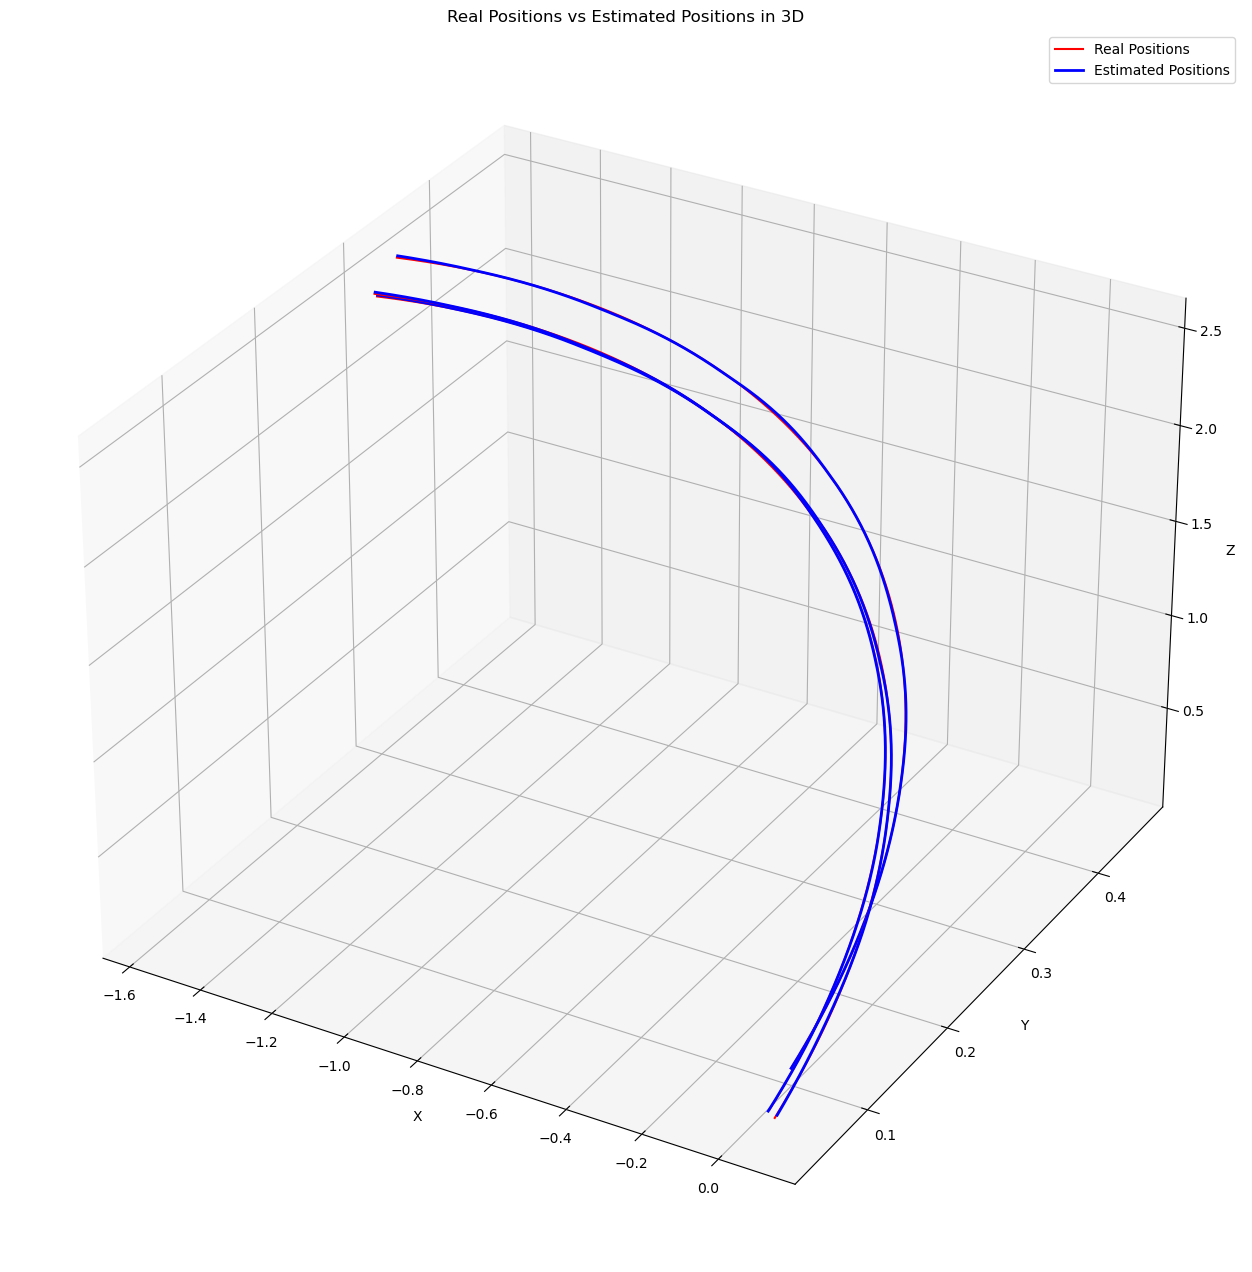

In [14]:
f2 = 0
Phase4Graph(real_positions, estimated_positions, conditions, v, f2)